<div style="padding: 30px; background-color: #4A90E2; color: white; text-align: center; border-radius: 15px; font-family: Arial, sans-serif;">
    <h1 style="font-size: 2.5em; margin-bottom: 10px;">Technical Support Line Performance Analysis</h1>
    <h2 style="font-weight: normal; font-size: 1.8em; margin-top: 0; color: #f0f8ff;">Identifying Key Drivers of Customer Satisfaction and Efficiency</h2>
    <hr style="border: 1px solid #f0f8ff; width: 80%; margin: 20px auto;">
    <p style="font-size: 1.2em; max-width: 800px; margin: 0 auto;">
        This analysis explores the top factors impacting the performance of the Technical Support Line, focusing on Average Handle Time (AHT) and Customer Satisfaction (CSAT).
        Using detailed insights and data visualizations, we identify root causes that affect key performance metrics, providing actionable recommendations for improvement.
    </p>
    <div style="display: flex; justify-content: center; margin-top: 20px;">
        <div style="margin: 0 10px; padding: 10px 20px; background-color: #50b3e6; border-radius: 8px;">
            <h3 style="margin: 0; color: #f0f8ff;">Data Source:</h3>
            <p style="margin: 0; color: #f0f8ff;">Technical Support KPI Metrics</p>
        </div>
        <div style="margin: 0 10px; padding: 10px 20px; background-color: #50b3e6; border-radius: 8px;">
            <h3 style="margin: 0; color: #f0f8ff;">Date:</h3>
            <p style="margin: 0; color: #f0f8ff;">November 2024</p>
        </div>
        <div style="margin: 0 10px; padding: 10px 20px; background-color: #50b3e6; border-radius: 8px;">
            <h3 style="margin: 0; color: #f0f8ff;">Author:</h3>
            <p style="margin: 0; color: #f0f8ff;">Fernando Oviedo Matamoros</p>
        </div>
    </div>
</div>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

#Display float with 2 decimal places
pd.options.display.float_format = '{:,.2f}'.format

import matplotlib.font_manager as fm
from matplotlib.ticker import FuncFormatter

In [2]:
# Set the font path to the location of your Century Gothic font
font_path = "GOTHIC.TTF"

# Create a font dictionary with Century Gothic font family
font_prop = fm.FontProperties(fname=font_path)

# Set the default font family to Century Gothic
plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams.update({'font.size': 11})

In [3]:
# store the sheet names from 'BI&A Test.xlsb' on a list
xls = pd.ExcelFile('./Data/BI&A Test.xlsb')
sheet_names = xls.sheet_names
sheet_names

['Case',
 'Analysis Output',
 'CSAT Data',
 'AHT Data',
 'Hire Dates',
 'Acronyms',
 'Formulae']

In [4]:
df = {}
for sheet_name in sheet_names:
    if sheet_name in ['CSAT Data', 'AHT Data', 'Hire Dates']:
        df[sheet_name] = pd.read_excel(xls, sheet_name)

<h2 style="color: #2e86c1; font-weight: bold; font-size: 1.5em;">
    📊 Preparing the <span style="color: #1abc9c;">CSAT</span> Dataframe
</h2>
<p style="color: #555; font-size: 1em;">
    This section focuses on transforming the data for the Customer Satisfaction (CSAT) rating column.
</p>

In [5]:
CSAT = df['CSAT Data'].copy()

In [6]:
CSAT

,Site Name,Month,Date,cases,Agent,Consult Outcome,Survey Count,1 Star Count,2 Star Count,3 Star Count,4 Star Count,5 Star Count,Helped Resolve Surveys,CSAT Star Average
0,India,07 - Jan,20181231,Case 1,Agent 2,Issue Code 1,1,1,0,0,0,0,0,1
1,India,07 - Jan,20181231,Case 2,Agent 1,Issue Code 1,1,0,0,0,1,0,0,1
2,India,07 - Jan,20181231,Case 3,Agent 2,Issue Code 2,1,1,0,0,0,0,0,1
3,India,07 - Jan,20181231,Case 4,Agent 3,Issue Code 2,1,0,0,0,1,0,0,1
4,India,07 - Jan,20181231,Case 5,Agent 3,Issue Code 2,1,0,0,0,0,1,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12949,India,09 - Mar,20190330,Case 12950,Agent 13,Issue Code 1,1,0,0,0,0,1,1,5
12950,India,09 - Mar,20190330,Case 12951,Agent 7,Issue Code 1,1,0,0,0,1,0,1,1
12951,India,09 - Mar,20190330,Case 12952,Agent 8,Issue Code 1,1,0,0,0,0,1,1,5
12952,India,09 - Mar,20190331,Case 12953,Agent 35,Issue Code 1,1,0,0,0,0,1,1,5


In [7]:
CSAT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12954 entries, 0 to 12953
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Site Name               12954 non-null  object
 1   Month                   12954 non-null  object
 2   Date                    12954 non-null  int64 
 3   cases                   12954 non-null  object
 4   Agent                   12954 non-null  object
 5   Consult Outcome         12954 non-null  object
 6   Survey Count            12954 non-null  int64 
 7   1 Star Count            12954 non-null  int64 
 8   2 Star Count            12954 non-null  int64 
 9   3 Star Count            12954 non-null  int64 
 10  4 Star Count            12954 non-null  int64 
 11  5 Star Count            12954 non-null  int64 
 12  Helped Resolve Surveys  12954 non-null  int64 
 13  CSAT Star Average       12954 non-null  int64 
dtypes: int64(9), object(5)
memory usage: 1.4+ MB


In [8]:
CSAT['Date'] = CSAT['Date'].astype(str).apply(lambda x: f'{x[0:4]}/{x[4:6]}/{x[6:]}')
CSAT['Date'] = pd.to_datetime(CSAT['Date'])
CSAT.head()

,Site Name,Month,Date,cases,Agent,Consult Outcome,Survey Count,1 Star Count,2 Star Count,3 Star Count,4 Star Count,5 Star Count,Helped Resolve Surveys,CSAT Star Average
0,India,07 - Jan,2018-12-31,Case 1,Agent 2,Issue Code 1,1,1,0,0,0,0,0,1
1,India,07 - Jan,2018-12-31,Case 2,Agent 1,Issue Code 1,1,0,0,0,1,0,0,1
2,India,07 - Jan,2018-12-31,Case 3,Agent 2,Issue Code 2,1,1,0,0,0,0,0,1
3,India,07 - Jan,2018-12-31,Case 4,Agent 3,Issue Code 2,1,0,0,0,1,0,0,1
4,India,07 - Jan,2018-12-31,Case 5,Agent 3,Issue Code 2,1,0,0,0,0,1,1,5


In [9]:
# Keep only the number of each value of the CSAT['Agent']
CSAT['Agent'] = CSAT['Agent'].str.extract('(\d+)').astype(int)
CSAT.head()

,Site Name,Month,Date,cases,Agent,Consult Outcome,Survey Count,1 Star Count,2 Star Count,3 Star Count,4 Star Count,5 Star Count,Helped Resolve Surveys,CSAT Star Average
0,India,07 - Jan,2018-12-31,Case 1,2,Issue Code 1,1,1,0,0,0,0,0,1
1,India,07 - Jan,2018-12-31,Case 2,1,Issue Code 1,1,0,0,0,1,0,0,1
2,India,07 - Jan,2018-12-31,Case 3,2,Issue Code 2,1,1,0,0,0,0,0,1
3,India,07 - Jan,2018-12-31,Case 4,3,Issue Code 2,1,0,0,0,1,0,0,1
4,India,07 - Jan,2018-12-31,Case 5,3,Issue Code 2,1,0,0,0,0,1,1,5


In [10]:
# Keep only the number of each value of the CSAT['Consult Outcome']
CSAT['Consult Outcome'] = CSAT['Consult Outcome'].str.extract('(\d+)').astype(int)
CSAT.head()

,Site Name,Month,Date,cases,Agent,Consult Outcome,Survey Count,1 Star Count,2 Star Count,3 Star Count,4 Star Count,5 Star Count,Helped Resolve Surveys,CSAT Star Average
0,India,07 - Jan,2018-12-31,Case 1,2,1,1,1,0,0,0,0,0,1
1,India,07 - Jan,2018-12-31,Case 2,1,1,1,0,0,0,1,0,0,1
2,India,07 - Jan,2018-12-31,Case 3,2,2,1,1,0,0,0,0,0,1
3,India,07 - Jan,2018-12-31,Case 4,3,2,1,0,0,0,1,0,0,1
4,India,07 - Jan,2018-12-31,Case 5,3,2,1,0,0,0,0,1,1,5


In [11]:
# Keep only the number of each value of the CSAT['cases']
CSAT['cases'] = CSAT['cases'].str.extract('(\d+)').astype(int)
CSAT.head()

,Site Name,Month,Date,cases,Agent,Consult Outcome,Survey Count,1 Star Count,2 Star Count,3 Star Count,4 Star Count,5 Star Count,Helped Resolve Surveys,CSAT Star Average
0,India,07 - Jan,2018-12-31,1,2,1,1,1,0,0,0,0,0,1
1,India,07 - Jan,2018-12-31,2,1,1,1,0,0,0,1,0,0,1
2,India,07 - Jan,2018-12-31,3,2,2,1,1,0,0,0,0,0,1
3,India,07 - Jan,2018-12-31,4,3,2,1,0,0,0,1,0,0,1
4,India,07 - Jan,2018-12-31,5,3,2,1,0,0,0,0,1,1,5


In [12]:
rates_cols = [f'{i} Star Count' for i in range(1, 6)]
rates_cols

['1 Star Count',
 '2 Star Count',
 '3 Star Count',
 '4 Star Count',
 '5 Star Count']

In [13]:
for i, col in enumerate(rates_cols):
    if [i + 1] == CSAT[CSAT[col] == 1]['CSAT Star Average'].astype(int).unique():
        print('Test PASSED', end = '\n\t')
        print(col, CSAT[CSAT[col] == 1]['CSAT Star Average'].unique())
    else:
        print('Test FAILED', end = '\n\t')
        print(col, CSAT[CSAT[col] == 1]['CSAT Star Average'].unique())
    
# There is a mistake in the data, the 'CSAT Star Average' is ok for all the 'Star Count' columns except for the '4 Star Count' column
# This column will be recalculated below

Test PASSED
	1 Star Count [1]
Test PASSED
	2 Star Count [2]
Test PASSED
	3 Star Count [3]
Test FAILED
	4 Star Count [1]
Test PASSED
	5 Star Count [5]


In [14]:
# Creating a new 'rate' column based on the columns with a "1"
CSAT['CSAT Star Average'] = CSAT[rates_cols].idxmax(axis = 1).str.extract('(\d)').astype(int)
CSAT.drop(columns = rates_cols, axis = 1, inplace = True)

CSAT.head()

,Site Name,Month,Date,cases,Agent,Consult Outcome,Survey Count,Helped Resolve Surveys,CSAT Star Average
0,India,07 - Jan,2018-12-31,1,2,1,1,0,1
1,India,07 - Jan,2018-12-31,2,1,1,1,0,4
2,India,07 - Jan,2018-12-31,3,2,2,1,0,1
3,India,07 - Jan,2018-12-31,4,3,2,1,0,4
4,India,07 - Jan,2018-12-31,5,3,2,1,1,5


In [15]:
CSAT['Helped Resolve Surveys'] = CSAT['Helped Resolve Surveys'].astype(bool)
CSAT.head()

,Site Name,Month,Date,cases,Agent,Consult Outcome,Survey Count,Helped Resolve Surveys,CSAT Star Average
0,India,07 - Jan,2018-12-31,1,2,1,1,False,1
1,India,07 - Jan,2018-12-31,2,1,1,1,False,4
2,India,07 - Jan,2018-12-31,3,2,2,1,False,1
3,India,07 - Jan,2018-12-31,4,3,2,1,False,4
4,India,07 - Jan,2018-12-31,5,3,2,1,True,5


In [16]:
# Reordering the columns
CSAT = CSAT[['cases', 'Site Name', 'Month', 'Date', 'Agent', 'Consult Outcome', 'CSAT Star Average', 'Survey Count', 'Helped Resolve Surveys']]
CSAT

,cases,Site Name,Month,Date,Agent,Consult Outcome,CSAT Star Average,Survey Count,Helped Resolve Surveys
0,1,India,07 - Jan,2018-12-31,2,1,1,1,False
1,2,India,07 - Jan,2018-12-31,1,1,4,1,False
2,3,India,07 - Jan,2018-12-31,2,2,1,1,False
3,4,India,07 - Jan,2018-12-31,3,2,4,1,False
4,5,India,07 - Jan,2018-12-31,3,2,5,1,True
...,...,...,...,...,...,...,...,...,...
12949,12950,India,09 - Mar,2019-03-30,13,1,5,1,True
12950,12951,India,09 - Mar,2019-03-30,7,1,4,1,True
12951,12952,India,09 - Mar,2019-03-30,8,1,5,1,True
12952,12953,India,09 - Mar,2019-03-31,35,1,5,1,True


In [17]:
# Checking for duplicated rows
CSAT.cases.duplicated().sum()

0

In [18]:
# Checking for missing values
CSAT.Month.value_counts(normalize = True)

Month
07 - Jan   0.42
08 - Feb   0.30
09 - Mar   0.29
Name: proportion, dtype: float64

In [19]:
# Checking for different values in the 'Consult Outcome' column
CSAT['Site Name'].value_counts(normalize = True)

Site Name
India   1.00
Name: proportion, dtype: float64

# Statistical Analysis

In [20]:
CSAT.columns

Index(['cases', 'Site Name', 'Month', 'Date', 'Agent', 'Consult Outcome',
       'CSAT Star Average', 'Survey Count', 'Helped Resolve Surveys'],
      dtype='object')

In [21]:
CSAT[['Consult Outcome', 
      'CSAT Star Average', 
      'Survey Count', 
      'Helped Resolve Surveys']].describe().T

,count,mean,std,min,25%,50%,75%,max
Consult Outcome,"12,954.00",3.07,2.32,1.00,1.00,2.00,5.00,12.00
CSAT Star Average,"12,954.00",4.15,1.43,1.00,4.00,5.00,5.00,5.00
Survey Count,"12,954.00",1.00,0.00,1.00,1.00,1.00,1.00,1.00


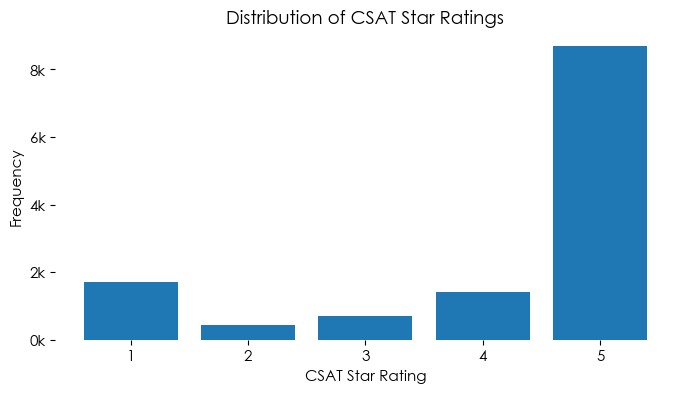

In [22]:
# Calculate distribution of ratings
rating_counts = CSAT['CSAT Star Average'].value_counts().sort_index()

# Plot distribution of ratings
plt.figure(figsize = (8, 4))
plt.bar(rating_counts.index, rating_counts.values)
plt.xlabel('CSAT Star Rating')
plt.ylabel('Frequency')
plt.title('Distribution of CSAT Star Ratings')
plt.xticks(range(1, 6))  # Ratings from 1 to 5

# Remove all spines
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# Format y-axis ticks e.g. 1000 as 1k
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x/1000)}k'))

# Save plot in high resolution
plt.savefig('./Plots/CSAT Star Ratings Distribution.png', dpi = 300, bbox_inches = 'tight')

plt.show()


### Analysis and Comments:
---
* Most customers rated 5 stars, indicating a high overall satisfaction.
* There is also a notable frequency of 1-star ratings, suggesting a significant portion of dissatisfied customers that may be negatively impacting the average CSAT.

In [23]:
from scipy.stats import chi2_contingency

# Creating a contingency table between 'CSAT Star Average' and 'Helped Resolve Surveys'
contingency_table = pd.crosstab(CSAT['CSAT Star Average'], CSAT['Helped Resolve Surveys'])
contingency_table

Helped Resolve Surveys,False,True
CSAT Star Average,,
1,1667,56
2,388,53
3,447,257
4,396,1009
5,565,8116


In [24]:
# Running the Chi-Squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

if p < 0.05:
    print(f'p-value: {p}', '→ The null hypothesis is rejected, meaning that the two variables are dependent')
    print(f'chi2: {chi2:.2f}')
else:    
    print(p, 'The null hypothesis is not rejected, meaning that the two variables are independent')
    print(f'chi2: {chi2:.2f}')


p-value: 0.0 → The null hypothesis is rejected, meaning that the two variables are dependent
chi2: 7457.33


### Analysis and comments:
---
* The p-value of 0.0 indicates a statistically significant association between `CSAT Star Average` and `Helped Resolve Surveys`. This means we can reject the null hypothesis, suggesting that the `CSAT Star Average` and whether an agent helped resolve the survey are not independent.
* Additionally, the large Chi-Squared statistic indicates that the observed distribution of` CSAT Star Average` across resolved and unresolved surveys is **unlikely to occur by chance**, suggesting a **meaningful association between these two variables**.

In [25]:
odds_ratios = {}

# Calculate odds for each CSAT rating
for rating in contingency_table.index:
    true_count = contingency_table.loc[rating, True]
    false_count = contingency_table.loc[rating, False]
    odds_true = true_count / (contingency_table[True].sum() - true_count)
    odds_false = false_count / (contingency_table[False].sum() - false_count)
    odds_ratios[rating] = odds_true / odds_false

# Convert odds_ratios to DataFrame for readability
odds_ratios_df = pd.DataFrame(list(odds_ratios.items()), columns=['CSAT Rating', 'Odds Ratio'])

odds_ratios_df


,CSAT Rating,Odds Ratio
0,1,0.01
1,2,0.04
2,3,0.19
3,4,0.92
4,5,30.28


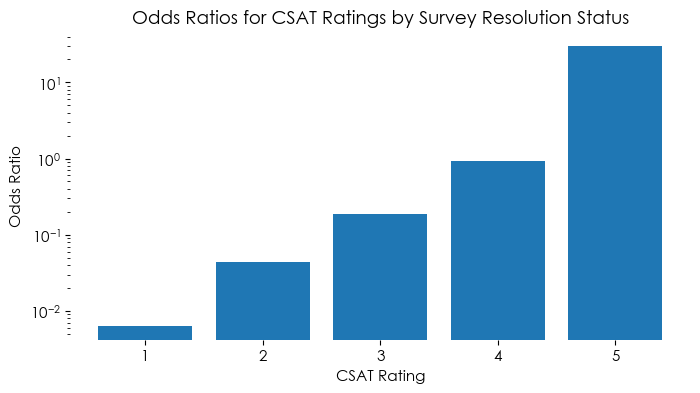

In [26]:
# Visualizing the Odds Ratios for each CSAT rating
plt.figure(figsize=(8, 4))
plt.bar(odds_ratios_df['CSAT Rating'], odds_ratios_df['Odds Ratio'])
plt.xlabel('CSAT Rating')
plt.ylabel('Odds Ratio')
plt.title('Odds Ratios for CSAT Ratings by Survey Resolution Status')
plt.yscale('log')  # Using a logarithmic scale for better visibility of large variations

# Remove all spines
for spine in plt.gca().spines.values():
    spine.set_visible(False)
# Save plot in high resolution
plt.savefig('./Plots/Odds Ratios for CSAT Ratings by Survey Resolution Status.png', dpi = 300, bbox_inches = 'tight')    
plt.show()

### Comments:
---
* Lower Ratings (1 and 2) have odds ratios significantly below 1, indicating they are much less likely when the survey is resolved, suggesting unresolved issues correlate strongly with dissatisfaction.
* High Rating (5) has an odds ratio above 10, showing a strong association with resolved surveys, implying that resolving issues leads to a substantially higher likelihood of a 5-star rating.

In [27]:
# Calculate percentage distribution of CSAT ratings by 'Helped Resolve Surveys' status
percentage_distribution = contingency_table.div(contingency_table.sum(axis = 0), axis = 1) * 100
percentage_distribution

Helped Resolve Surveys,False,True
CSAT Star Average,,
1,48.14,0.59
2,11.20,0.56
3,12.91,2.71
4,11.44,10.63
5,16.32,85.51


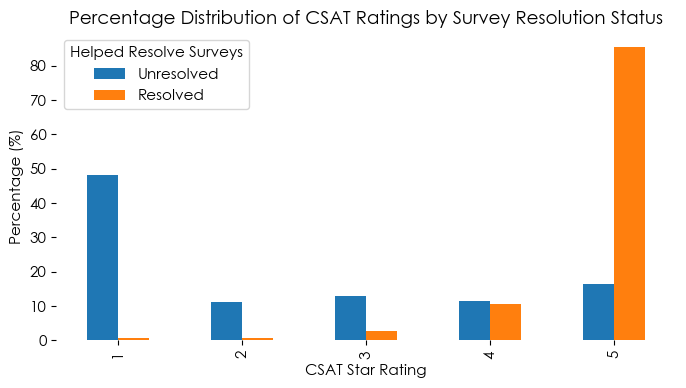

In [28]:
# Plotting the percentage distribution of CSAT ratings by 'Helped Resolve Surveys' status
percentage_distribution.plot(kind = 'bar', figsize = (8, 4))

plt.xlabel('CSAT Star Rating')
plt.ylabel('Percentage (%)')
plt.title('Percentage Distribution of CSAT Ratings by Survey Resolution Status')
plt.legend(title='Helped Resolve Surveys', labels=['Unresolved', 'Resolved'])

# Remove all spines
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# Save plot in high resolution
plt.savefig('./Plots/Percentage Distribution of CSAT Ratings by Survey Resolution Status.png', dpi = 300, bbox_inches = 'tight')
plt.show()


### Comments
---
* **Unresolved Surveys** have a high concentration of low ratings, with nearly 50% receiving a 1-star rating, suggesting significant dissatisfaction when issues are not resolved.
* **Resolved Surveys** overwhelmingly result in 5-star ratings (over 80%), indicating a strong positive impact on customer satisfaction when issues are addressed.

<h2 style="color: #2e86c1; font-weight: bold; font-size: 1.5em;">
    📊 Preparing the <span style="color: #1abc9c;">AHT</span> Dataframe
</h2>
<p style="color: #555; font-size: 1em;">
    This section focuses on transforming the data for the Average Handle Time (AHT).
</p>

In [29]:
AHT = df['AHT Data'].copy()
AHT

,Site Name,Month,Date,Case ID,Agent,Consult Outcome,Chat Engaged,Total Work Minutes,Total Wrap Minutes,AHT
0,India,07 - Jan,20181231,Case 1,Agent 2,Issue Code 1,1,114.67,0.05,114.72
1,India,07 - Jan,20181231,Case 2,Agent 1,Issue Code 1,1,76.32,1.92,78.23
2,India,07 - Jan,20181231,Case 3,Agent 2,Issue Code 2,1,103.17,0.27,103.43
3,India,07 - Jan,20181231,Case 4,Agent 3,Issue Code 2,1,16.32,0.00,16.32
4,India,07 - Jan,20181231,Case 5,Agent 3,Issue Code 2,1,37.93,0.48,38.42
...,...,...,...,...,...,...,...,...,...,...
12949,India,09 - Mar,20190330,Case 12950,Agent 13,Issue Code 1,1,21.53,0.77,22.30
12950,India,09 - Mar,20190330,Case 12951,Agent 7,Issue Code 1,1,23.47,0.38,23.85
12951,India,09 - Mar,20190330,Case 12952,Agent 8,Issue Code 1,1,55.98,0.60,56.58
12952,India,09 - Mar,20190331,Case 12953,Agent 35,Issue Code 1,1,42.47,1.92,44.38


In [30]:
AHT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12954 entries, 0 to 12953
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Site Name           12954 non-null  object 
 1   Month               12954 non-null  object 
 2   Date                12954 non-null  int64  
 3   Case ID             12954 non-null  object 
 4   Agent               12954 non-null  object 
 5   Consult Outcome     12954 non-null  object 
 6   Chat Engaged        12954 non-null  int64  
 7   Total Work Minutes  12954 non-null  float64
 8   Total Wrap Minutes  12954 non-null  float64
 9   AHT                 12954 non-null  float64
dtypes: float64(3), int64(2), object(5)
memory usage: 1012.2+ KB


In [31]:
AHT['Agent'] = AHT['Agent'].astype(str).str.extract('(\d+)').astype(int)

AHT['Consult Outcome'] = AHT['Consult Outcome'].str.extract('(\d+)').astype(int)

AHT['Case ID'] = AHT['Case ID'].str.extract('(\d+)').astype(int)

AHT['Chat Engaged'] = AHT['Chat Engaged'].astype(bool)

AHT['Date'] = AHT['Date'].astype(str).apply(lambda x: f'{x[0:4]}/{x[4:6]}/{x[6:]}')
AHT['Date'] = pd.to_datetime(AHT['Date'])

AHT.head()

,Site Name,Month,Date,Case ID,Agent,Consult Outcome,Chat Engaged,Total Work Minutes,Total Wrap Minutes,AHT
0,India,07 - Jan,2018-12-31,1,2,1,True,114.67,0.05,114.72
1,India,07 - Jan,2018-12-31,2,1,1,True,76.32,1.92,78.23
2,India,07 - Jan,2018-12-31,3,2,2,True,103.17,0.27,103.43
3,India,07 - Jan,2018-12-31,4,3,2,True,16.32,0.00,16.32
4,India,07 - Jan,2018-12-31,5,3,2,True,37.93,0.48,38.42


In [32]:
summ_stats = AHT[['Consult Outcome', 'Total Work Minutes', 'Total Wrap Minutes', 'AHT']].describe().T
summ_stats

,count,mean,std,min,25%,50%,75%,max
Consult Outcome,"12,954.00",3.07,2.32,1.00,1.00,2.00,5.00,12.00
Total Work Minutes,"12,954.00",36.26,25.65,0.02,18.10,30.35,48.35,483.87
Total Wrap Minutes,"12,954.00",2.48,2.67,0.00,0.75,1.72,3.18,19.98
AHT,"12,954.00",38.74,25.75,0.58,20.60,32.96,51.12,484.97


In [33]:
def plot_distribution(data, column, xlabel, ylabel, bins = 30):
    # Create the figure and axes for a box plot on top and histogram below
    fig, (ax_box, ax_hist) = plt.subplots(2, 1, figsize=(10, 6), sharex=True, gridspec_kw={"height_ratios": (0.3, 0.7)})

    # Box plot (horizontal)
    ax_box.boxplot(data, vert=False)
    ax_box.set(title = f"Boxplot and Histogram of {column}")

    # Remove spines for box plot
    for spine in ax_box.spines.values():
        spine.set_visible(False)

    # Histogram
    ax_hist.hist(data, bins = 60, color='skyblue', edgecolor='black', linewidth = 0.5)
    ax_hist.set(xlabel=f"{column}", ylabel="Frequency")

    # Remove spines for histogram
    for spine in ax_hist.spines.values():
        spine.set_visible(False)
    # Enable grid for both subplots
    ax_hist.grid(True)
    ax_box.grid(True, color = 'lightgrey', linestyle = '--')
    ax_hist.grid(True, color = 'lightgrey', linestyle = '--')

    # Format y-axis ticks e.g. 1000 as 1k
    plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1000:.1f}k'))

    # Show the combined plot
    plt.tight_layout()
    plt.savefig(f'./Plots/{column} Distribution.png', dpi = 300, bbox_inches = 'tight')
    plt.show()

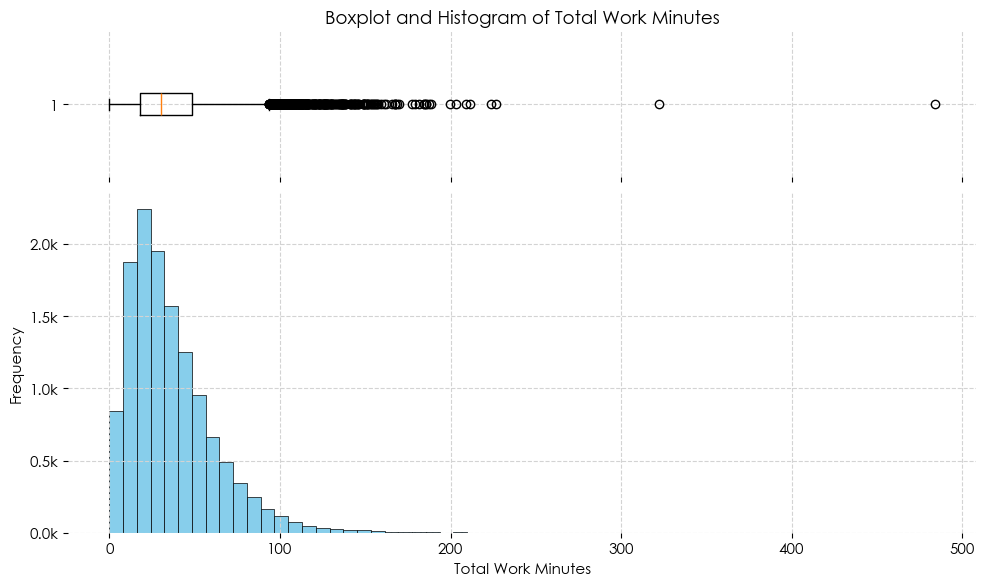

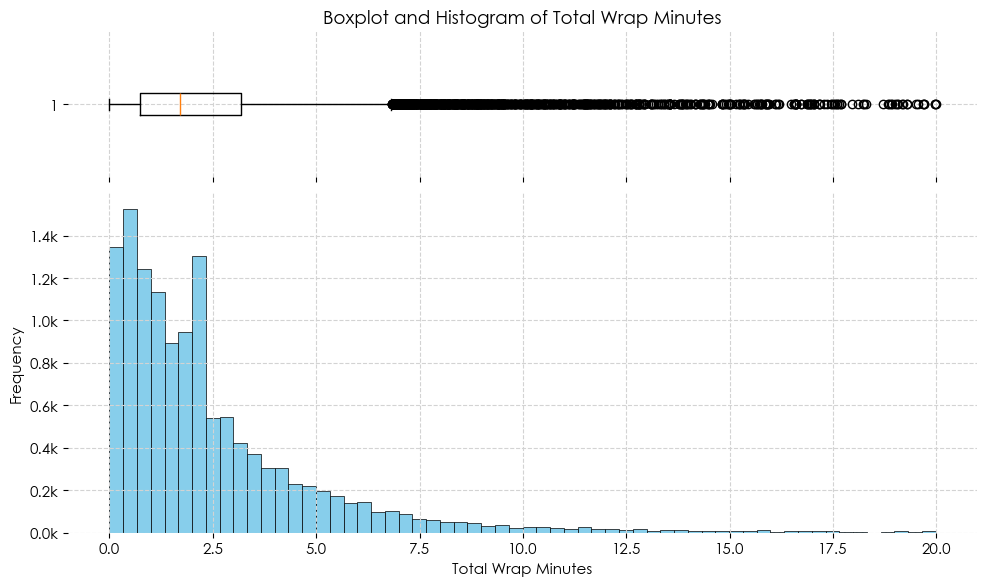

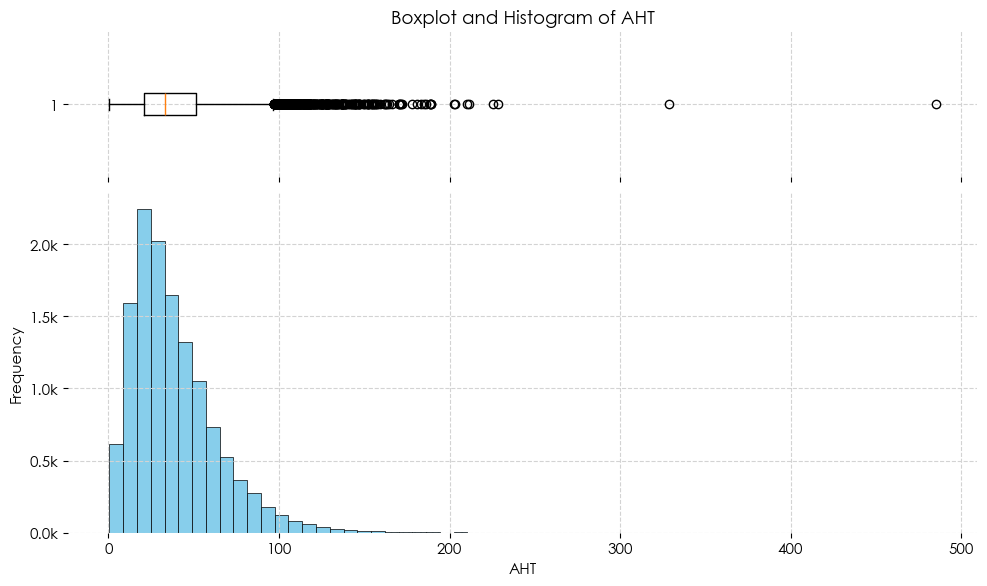

In [34]:
columns = ['Total Work Minutes', 'Total Wrap Minutes', 'AHT']

for column in columns:
    plot_distribution(AHT[column], column, 'Minutes', 'Frequency', bins = 60)
    # Save plot in high resolution

In [35]:
# Determine the dristribution like lognormal, etc of the AHT['AHT'] column

from scipy.stats import norm, lognorm, expon, gamma, kstest

# Fit a lognormal distribution to the data
shape, loc, scale = lognorm.fit(AHT['AHT'])

# Perform the Kolmogorov-Smirnov test for lognormality

stat, p = kstest(AHT['AHT'], 'lognorm', args=(shape, loc, scale))

# Interpret the test result
alpha = 0.05

if p > alpha:
    print('Sample looks lognormal (fail to reject H0)')
else:
    print('Sample does not look lognormal (reject H0)')

Sample does not look lognormal (reject H0)


## Removing Outliers from AHT
Method: IQR

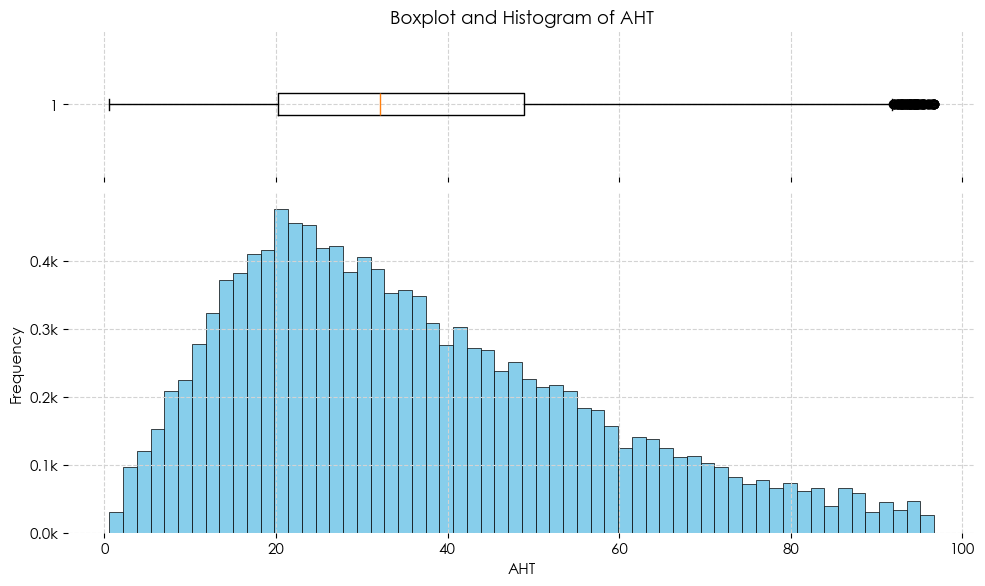

In [36]:
import outlier_detection as od

AHT = od.flag_outliers(df = AHT, column_name = 'AHT', multilplier = 1.5)

plot_distribution(AHT[~AHT.Outlier]['AHT'], 'AHT', 'Minutes', 'Frequency', bins = 60)

In [37]:
AHT.Outlier.value_counts(normalize = True)

Outlier
False   0.97
True    0.03
Name: proportion, dtype: float64

### Analysis and Comments:
---
* Raw Data: The AHT distribution is highly right-skewed, with extreme outliers stretching up to 500 minutes, which likely distort the overall metrics.
* After Removing Outliers: The distribution becomes more centralized around the 20–40 minute range, providing a clearer view of typical AHT values and likely aligning better with performance targets.

#### Further Analysis:
---
* **Impact of Outliers on Average AHT:** In the raw data, the presence of extreme outliers likely inflates the average AHT, making it harder to accurately assess typical performance. Removing these outliers gives a more representative measure of central tendency, such as the median, which is less sensitive to extreme values.
* **Performance Consistency:** Without the outliers, the AHT distribution shows a more consistent performance level, with most cases completed within 20–40 minutes. This narrower range can help identify the most common AHT and set more realistic targets or benchmarks for performance evaluation.
* **Process Improvement Opportunities:** The extreme outliers might indicate specific cases that require a deep dive. By investigating these outliers, it may be possible to uncover specific scenarios (e.g., complex cases or system issues) that cause delays, presenting an opportunity to streamline processes or provide targeted training.
* **Goal Alignment:** With outliers removed, the data provides a clearer comparison against the target AHT of 28 minutes, helping to gauge how well the team’s performance aligns with client expectations.

<h2 style="color: #2e86c1; font-weight: bold; font-size: 1.5em;">
    📊 Preparing the <span style="color: #1abc9c;">Hire Dates</span> Dataframe
</h2>
<p style="color: #555; font-size: 1em;">
    This section focuses on transforming the data for the Customer Satisfaction (CSAT) rating column.
</p>

In [38]:
Hire_Dates = df['Hire Dates'].copy()
Hire_Dates

,Agent,Hire Date
0,Agent 1,42506
1,Agent 2,43270
2,Agent 3,43576
3,Agent 4,43564
4,Agent 5,43627
...,...,...
60,Agent 61,43617
61,Agent 62,43617
62,Agent 63,43617
63,Agent 64,43617/


In [39]:
Hire_Dates.dtypes

Agent        object
Hire Date    object
dtype: object

In [40]:
try:
    Hire_Dates['Hire Date'] = pd.to_datetime(Hire_Dates['Hire Date'])
except ValueError as e:
    print(e)

year 43617 is out of range: 43617/, at position 63


In [41]:
Hire_Dates['Hire Date'] = Hire_Dates['Hire Date'].astype(str).str.replace(r'\/$', '', regex = True)

# Convert to datetime, assuming it's in Excel serial date format
Hire_Dates['Hire Date'] = pd.to_datetime(Hire_Dates['Hire Date'].astype(int), origin = '1899-12-30', unit = 'D')

In [42]:
# Ensure 'Agent' column is of type string before using .str accessor
Hire_Dates['Agent'] = Hire_Dates['Agent'].astype(str).str.extract('(\d+)').astype(int)
Hire_Dates.head()

,Agent,Hire Date
0,1,2016-05-16
1,2,2018-06-19
2,3,2019-04-21
3,4,2019-04-09
4,5,2019-06-11


### Lets create a columns with the Seniority (in terms of years since Hire Date)

In [43]:
Hire_Dates['Seniority'] = pd.to_datetime('today') - Hire_Dates['Hire Date']
Hire_Dates['Seniority'] = (Hire_Dates['Seniority'].dt.days / 365).astype(float)


bins = [0, 3, 5, 7, 9, float('inf')]  # Define the bin edges
labels = ['Associate', 'Junior', 'Mid-level', 'Senior', 'Expert']  # Define the category labels

# Create the 'Seniority Category' column
Hire_Dates['Seniority Category'] = pd.cut(Hire_Dates['Seniority'], bins=bins, labels=labels, right=False)

Hire_Dates.head()


,Agent,Hire Date,Seniority,Seniority Category
0,1,2016-05-16,8.55,Senior
1,2,2018-06-19,6.46,Mid-level
2,3,2019-04-21,5.62,Mid-level
3,4,2019-04-09,5.65,Mid-level
4,5,2019-06-11,5.48,Mid-level


In [44]:
Hire_Dates['Seniority Category'].value_counts(normalize = True)

Seniority Category
Mid-level   0.82
Senior      0.17
Expert      0.02
Associate   0.00
Junior      0.00
Name: proportion, dtype: float64

<h2 style="color: #2e86c1; font-weight: bold; font-size: 1.5em;">
    📊 Merging <span style="color: #1abc9c;">All Data</span> in a single Dataframe
</h2>
<p style="color: #555; font-size: 1em;">
    This section focuses on merging all the previous dataframs into a single one
</p>

In [45]:
print(Hire_Dates.shape)
Hire_Dates.head()

(65, 4)


,Agent,Hire Date,Seniority,Seniority Category
0,1,2016-05-16,8.55,Senior
1,2,2018-06-19,6.46,Mid-level
2,3,2019-04-21,5.62,Mid-level
3,4,2019-04-09,5.65,Mid-level
4,5,2019-06-11,5.48,Mid-level


In [46]:
print(CSAT.shape)
CSAT.rename(columns = {'cases': 'Case ID'}, inplace = True)
CSAT.head()

(12954, 9)


,Case ID,Site Name,Month,Date,Agent,Consult Outcome,CSAT Star Average,Survey Count,Helped Resolve Surveys
0,1,India,07 - Jan,2018-12-31,2,1,1,1,False
1,2,India,07 - Jan,2018-12-31,1,1,4,1,False
2,3,India,07 - Jan,2018-12-31,2,2,1,1,False
3,4,India,07 - Jan,2018-12-31,3,2,4,1,False
4,5,India,07 - Jan,2018-12-31,3,2,5,1,True


In [47]:
print(AHT.shape)
AHT.head()

(12954, 11)


,Site Name,Month,Date,Case ID,Agent,Consult Outcome,Chat Engaged,Total Work Minutes,Total Wrap Minutes,AHT,Outlier
0,India,07 - Jan,2018-12-31,1,2,1,True,114.67,0.05,114.72,True
1,India,07 - Jan,2018-12-31,2,1,1,True,76.32,1.92,78.23,False
2,India,07 - Jan,2018-12-31,3,2,2,True,103.17,0.27,103.43,True
3,India,07 - Jan,2018-12-31,4,3,2,True,16.32,0.00,16.32,False
4,India,07 - Jan,2018-12-31,5,3,2,True,37.93,0.48,38.42,False


In [48]:
final_df = pd.merge(CSAT, AHT[['Agent', 
                               'Consult Outcome', 
                               'Case ID', 
                               'Chat Engaged', 
                               'AHT', 
                               'Outlier']], 
                    on = ['Agent', 'Case ID', 'Consult Outcome'], 
                    how = 'left')

final_df

,Case ID,Site Name,Month,Date,Agent,Consult Outcome,CSAT Star Average,Survey Count,Helped Resolve Surveys,Chat Engaged,AHT,Outlier
0,1,India,07 - Jan,2018-12-31,2,1,1,1,False,True,114.72,True
1,2,India,07 - Jan,2018-12-31,1,1,4,1,False,True,78.23,False
2,3,India,07 - Jan,2018-12-31,2,2,1,1,False,True,103.43,True
3,4,India,07 - Jan,2018-12-31,3,2,4,1,False,True,16.32,False
4,5,India,07 - Jan,2018-12-31,3,2,5,1,True,True,38.42,False
...,...,...,...,...,...,...,...,...,...,...,...,...
12949,12950,India,09 - Mar,2019-03-30,13,1,5,1,True,True,22.30,False
12950,12951,India,09 - Mar,2019-03-30,7,1,4,1,True,True,23.85,False
12951,12952,India,09 - Mar,2019-03-30,8,1,5,1,True,True,56.58,False
12952,12953,India,09 - Mar,2019-03-31,35,1,5,1,True,True,44.38,False


In [49]:
final_df = pd.merge(final_df, Hire_Dates[['Agent', 'Seniority', 'Seniority Category']], on = 'Agent', how = 'left')
final_df

,Case ID,Site Name,Month,Date,Agent,Consult Outcome,CSAT Star Average,Survey Count,Helped Resolve Surveys,Chat Engaged,AHT,Outlier,Seniority,Seniority Category
0,1,India,07 - Jan,2018-12-31,2,1,1,1,False,True,114.72,True,6.46,Mid-level
1,2,India,07 - Jan,2018-12-31,1,1,4,1,False,True,78.23,False,8.55,Senior
2,3,India,07 - Jan,2018-12-31,2,2,1,1,False,True,103.43,True,6.46,Mid-level
3,4,India,07 - Jan,2018-12-31,3,2,4,1,False,True,16.32,False,5.62,Mid-level
4,5,India,07 - Jan,2018-12-31,3,2,5,1,True,True,38.42,False,5.62,Mid-level
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12949,12950,India,09 - Mar,2019-03-30,13,1,5,1,True,True,22.30,False,6.05,Mid-level
12950,12951,India,09 - Mar,2019-03-30,7,1,4,1,True,True,23.85,False,5.59,Mid-level
12951,12952,India,09 - Mar,2019-03-30,8,1,5,1,True,True,56.58,False,5.49,Mid-level
12952,12953,India,09 - Mar,2019-03-31,35,1,5,1,True,True,44.38,False,6.17,Mid-level


In [50]:
final_df = final_df[final_df['Outlier'] == False].copy()
final_df[['CSAT Star Average', 'AHT']].corr()

,CSAT Star Average,AHT
CSAT Star Average,1.00,0.18
AHT,0.18,1.00


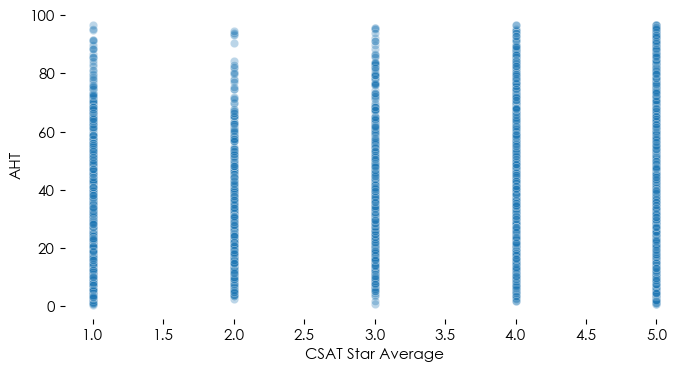

In [51]:
# plot scatter plot between 'CSAT Star Average' and 'AHT'
plt.figure(figsize = (8, 4))
sns.scatterplot(data = final_df, x = 'CSAT Star Average', y = 'AHT', alpha = 0.3)
plt.xlabel('CSAT Star Average')
plt.ylabel('AHT')

# Remove all spines
for spine in plt.gca().spines.values():
    spine.set_visible(False)
# save the plot in high resolution
plt.savefig('./Plots/CSAT Star Average vs AHT.png', dpi = 300, bbox_inches = 'tight')
plt.show()

### Analysis and Comments:
---
* **Weak Correlation:** There doesn’t appear to be a strong relationship between AHT and CSAT rating, as the AHT range is relatively similar across all CSAT ratings.
* **Consistent AHT Across Ratings:** The AHT distribution remains mostly uniform for each CSAT level, suggesting that factors other than handle time might play a larger role in customer satisfaction.

In [52]:
# Create a pivot table to calculate the average AHT for each CSAT rating and also the standard deviation
aht_by_csat = final_df.pivot_table(index='CSAT Star Average', values='AHT', aggfunc=['mean', 'std'])
aht_by_csat.columns = ['AHT Mean', 'AHT Std']

### Estimating correlation with a different approach

In [53]:
data = aht_by_csat.reset_index()
data

,CSAT Star Average,AHT Mean,AHT Std
0,1,27.23,18.36
1,2,32.14,19.71
2,3,34.11,20.59
3,4,36.42,20.69
4,5,38.21,20.64


In [54]:
# Calculate correlation for CSAT Star Average & AHT Mean
correlation = data['CSAT Star Average'].corr(data['AHT Mean'])
print(correlation)

0.9766567838566425


In [55]:
# describe the AHT by CSAT Star Average in the final df
CSAT_vs_AHT = final_df.groupby('CSAT Star Average')['AHT'].describe().reset_index()
CSAT_vs_AHT

,CSAT Star Average,count,mean,std,min,25%,50%,75%,max
0,1,"1,699.00",27.23,18.36,0.58,13.17,23.00,37.79,96.67
1,2,435.00,32.14,19.71,2.67,17.10,28.15,44.46,94.53
2,3,689.00,34.11,20.59,0.75,18.37,29.52,46.70,95.55
3,4,"1,364.00",36.42,20.69,1.72,20.47,32.34,48.47,96.52
4,5,"8,364.00",38.21,20.64,0.70,22.25,34.40,51.47,96.72


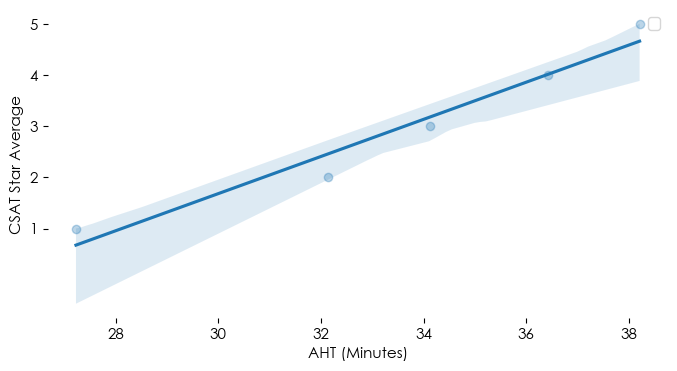

In [56]:
# Plot using regplot for the cleaned data
plt.figure(figsize=(8, 4))

# Plot the regression line
sns.regplot(data= data, y='CSAT Star Average', x='AHT Mean', scatter_kws={'alpha':0.3})

# Set x-axis ticks to integers only
plt.yticks(data['CSAT Star Average'])  # Specify the exact ticks you want

# Add title and labels
#plt.title('Average AHT by CSAT Star Rating')
plt.ylabel('CSAT Star Average')
plt.xlabel('AHT (Minutes)')
plt.legend()

# Remove all spines
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# Save plot in high resolution
plt.savefig('./Plots/Average AHT by CSAT Star Rating.png', dpi = 300, bbox_inches = 'tight')
plt.show()

### Analysis and Comments:
---
* CSAT Star Average is highly correlated to AHT (Person index = 98%)
* **Strong Positive Correlation:** There is a high positive correlation between the CSAT Star Average and the mean AHT. This suggests that, on average, as the AHT increases, so does the CSAT rating.
* **Implication:** Unlike the scatter plot with individual AHT values, the aggregated data (grouped by CSAT levels) indicates that higher handle times are associated with higher customer satisfaction, which might reflect more thorough support for complex issues.
* This insight suggests that maintaining a slightly higher AHT for complex cases might positively impact CSAT, as customers may appreciate more comprehensive support. However, balancing efficiency with quality remains essential.

#### From Plot:
---
* The plot shows a positive relationship between CSAT Star Average and AHT (Minutes), indicating that as customer satisfaction rating increases, the average handling time slightly rises.
* The shaded area around the regression line represents the 95% confidence interval, suggesting that while the trend is clear, there is moderate variability in the AHT as CSAT Star Average changes, especially at lower and higher ratings.

In [57]:
HR_by_rate = pd.pivot_table(final_df, index = 'CSAT Star Average', values = 'Case ID', columns = 'Helped Resolve Surveys', aggfunc = 'count').reset_index()
HR_by_rate.columns = ['CSAT Star Average', 'Unresolved', 'Resolved']
HR_by_rate['%HR'] = (HR_by_rate['Resolved'] / (HR_by_rate['Resolved'] + HR_by_rate['Unresolved']) * 100).round(1)
HR_by_rate

,CSAT Star Average,Unresolved,Resolved,%HR
0,1,1644,55,3.20
1,2,383,52,12.00
2,3,439,250,36.30
3,4,389,975,71.50
4,5,547,7817,93.50


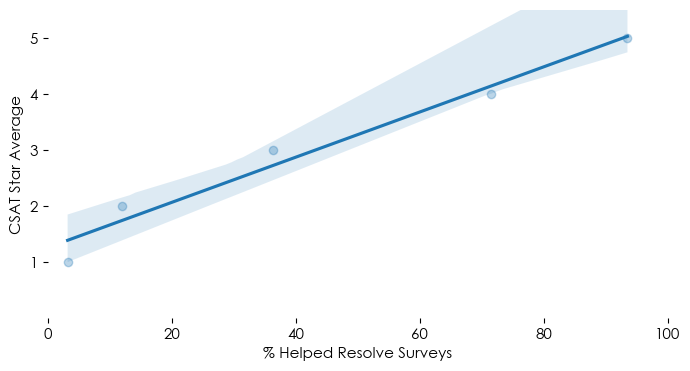

In [58]:
#plot the percentage of Helped Resolve Surveys by CSAT Star Average with regplot
plt.figure(figsize = (8, 4))
sns.regplot(data = HR_by_rate, y = 'CSAT Star Average', x = '%HR', scatter_kws = {'alpha': 0.3})
plt.ylabel('CSAT Star Average')
plt.xlabel('% Helped Resolve Surveys')
#plt.title('Percentage of Helped Resolve Surveys by CSAT Star Average')
# Show only integer ticks on x-axis
plt.yticks(HR_by_rate['CSAT Star Average'])
plt.xlim(0, 100)  # Set y-axis limits to 0-100
plt.ylim(0, 5.5)  # Set x-axis limits to 0-5
# Remove all spines
for spine in plt.gca().spines.values():
    spine.set_visible(False)

#save the plot in high resolution
plt.savefig('./Plots/Percentage of Helped Resolve Surveys by CSAT Star Average.png', dpi = 300, bbox_inches = 'tight')
plt.show()

In [59]:
correlation = HR_by_rate['CSAT Star Average'].corr(HR_by_rate['%HR'])
correlation

0.9841502983030073

In [60]:
HR_vs_AHT = pd.merge(HR_by_rate[['CSAT Star Average', '%HR']], CSAT_vs_AHT[['CSAT Star Average', 'mean']], on = 'CSAT Star Average')
HR_vs_AHT.columns = ['CSAT Star Average', '%HR', 'AHT']
HR_vs_AHT['%HR'].corr(HR_vs_AHT['AHT'])

0.9282616262624706

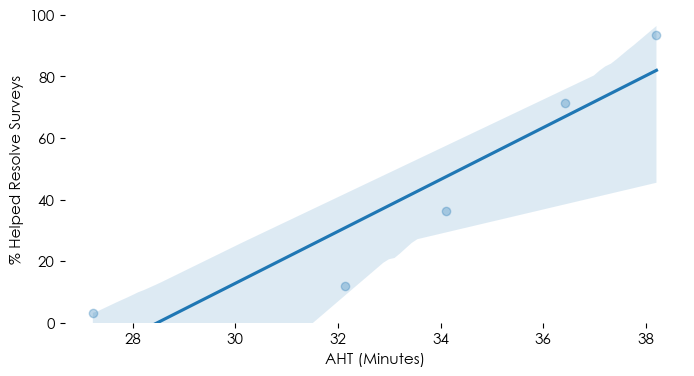

In [61]:
# Plot '%HR' vs 'AHT' with regplot
plt.figure(figsize = (8, 4))
sns.regplot(data = HR_vs_AHT, y = '%HR', x = 'AHT', scatter_kws = {'alpha': 0.3})
plt.ylabel('% Helped Resolve Surveys')
plt.xlabel('AHT (Minutes)')
#plt.title('% Helped Resolve Surveys by AHT')
plt.ylim(0, 100)  # Set x-axis limits to 0-100

# Remove all spines
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# Save plot in high resolution
plt.savefig('./Plots/% Helped Resolve Surveys by AHT.png', dpi = 300, bbox_inches = 'tight')

plt.show()

<h2 style="color: #2e86c1; font-weight: bold; font-size: 2.5em;">
    📊 Final Analysis <span style="color: #1abc9c;">Analysis</span> from BI and Python Results
</h2>
<p style="color: #555; font-size: 1.5em;">
    This section shows the final analysis for the results
</p>

In [62]:
from IPython.display import HTML

# Embed the iframe
iframe_code = """
<iframe title="TechSupport BI" width="1200" height="747" 
src="https://app.powerbi.com/view?r=eyJrIjoiYzcxMTkzMjktYmYzYS00NWVlLTk2NzktZDVkMDE1ZDE2MDU3IiwidCI6IjI1NmQ1MThiLTVkNDQtNDExZS04MDZmLTc3ZTEzYmFjYWRhNyIsImMiOjR9" 
frameborder="0" allowFullScreen="true"></iframe>
"""

display(HTML(iframe_code))

### Page 2:

* **CSAT and AHT Overview:** The current CSAT score is 4.1, slightly below the target, while the average AHT is 36.04 minutes, exceeding the target of 28 minutes. This suggests that extended handling times may be impacting customer satisfaction.

* **HR% by CSAT:** There is a positive correlation between higher CSAT ratings and the HR% metric, indicating that cases resolved on the first attempt likely contribute to higher satisfaction scores.

* **AHT & Wrap Performance:** AHT consistently remains above the target, suggesting potential inefficiencies or complex cases that take more time to resolve. Addressing these could help bring the AHT closer to the target.

* **NPS Analysis:** The Net Promoter Score (NPS) shows a balanced distribution, but there’s room to increase the proportion of promoters by focusing on areas impacting satisfaction.

### Page 3
---
* **AHT by Experience Level:** Mid-level agents have the highest total cost associated with AHT, while expert agents contribute the least. This suggests that more experienced agents handle cases more efficiently, which could be explored to reduce AHT further by investing in training for mid-level agents.

* **CSAT by Experience Level:** CSAT scores are fairly similar across experience levels, indicating that satisfaction is relatively consistent regardless of agent expertise. However, this may also suggest room to boost CSAT through targeted training to enhance service quality further.

* **Agent Distribution by Expertise:** The majority of agents are mid-level, which aligns with the higher AHT costs seen in that group. A more balanced distribution of expertise could improve overall efficiency.

* **Monthly Cases per Agent:** There is a noticeable spike in cases per agent in December, with a gradual decline afterward. This seasonal trend could indicate periods of increased demand, suggesting that resource allocation during peak times could improve service efficiency and reduce strain on agents.

### Page 4
---
* **AHT by Issue:** Certain issues (e.g., issues 1) incur significantly higher costs in terms of AHT, suggesting that these are more complex or time-consuming to resolve. Identifying root causes for these could help reduce overall AHT and costs.

* **CSAT by Issue:** CSAT scores vary by issue type, with some issues (e.g., 10 and 11) receiving relatively higher ratings, while others (e.g., 2 and 5) are rated lower. This indicates that certain issues are better handled or more satisfying for customers, and it may be beneficial to focus improvement efforts on the lower-rated issues.

* **AHT% by CSAT (Top 80%):** The AHT tends to increase with higher CSAT ratings, suggesting that customers may value thoroughness over speed. Balancing efficiency with quality may be key to achieving both CSAT and AHT targets.

* **Cases by Issue (Pareto Analysis):** The Pareto chart shows that a small number of issues account for the majority of cases, indicating an 80/20 distribution. Focusing on these high-frequency issues could lead to substantial improvements in both AHT and CSAT.

### Key Root Causes Negatively Impacting Performance
---
* **High AHT for Specific Issues:** Issues like 1 and 7 have elevated AHT, inflating overall handle times and costs. Targeted training and process improvements could reduce AHT for these cases.

* **Low CSAT for Certain Issues:** Issues 2 and 5 show lower customer satisfaction. Addressing specific pain points within these issues could boost CSAT.

* **Skill Gaps in Mid-Level Agents:** Mid-level agents, who make up most of the team, have higher AHT than senior agents. Additional training or mentorship could close this gap.

* **High Volume of Frequent Issues:** A small group of issues represents the majority of cases. Streamlining resolution for these high-frequency issues could significantly improve overall performance.